In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


train=pd.read_csv("Trainfile.csv")
test=pd.read_csv("Testfile.csv")

train.shape

#Separate categorical data 

cat_train=train.select_dtypes(include=['object'])
cat_test=test.select_dtypes(include=['object'])

train_numeric= train.select_dtypes(include=['int64','float64'])
test_numeric=test.select_dtypes(include=['int64','float64'])

print(train_numeric
      .isnull().sum())

train_numeric.drop(['LotFrontage','GarageYrBlt'],axis=1)
test_numeric.drop(['LotFrontage','GarageYrBlt'],axis=1)

#fill with mean
train_numeric=train_numeric.fillna(train_numeric.mean())
test_numeric=test_numeric.fillna(test_numeric.mean())

cat_train.isnull().sum()


cat_test=cat_test.drop(['Alley', 'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'],axis=1)


cat_test.isnull().sum()

#fill with mode

cat_test = cat_test.fillna(cat_test.mode().iloc[0])
cat_train= cat_train.fillna(cat_train.mode().iloc[0])

print(cat_train.shape,cat_test.shape)


#one hot encoding categorical data
train_cat= pd.get_dummies(cat_train, sparse=True)
test_cat=pd.get_dummies(cat_test,sparse=True)

print(train_cat.shape,test_cat.shape)

#Upon joining two dataframes by .concat() function, the train dataframe and test dataframe have different number of columns caused due to categorical encoding hence using .align to maintain same number of rows
traincat = pd.get_dummies(cat_train)
testcat = pd.get_dummies(cat_test)
print(traincat.shape,testcat.shape)
traincat, testcat = traincat.align(testcat, join='left', axis=1)

print(traincat.shape,testcat.shape)
print(sum(testcat.isnull().sum()))

trainfinal=pd.concat((train_numeric,traincat),axis=1)
testfinal=pd.concat((test_numeric,testcat),axis=1)

testcat=testcat.fillna(testcat.mode().iloc[0])



print(trainfinal.shape,testfinal.shape)

Idx                0
MSSubClass         0
LotFrontage      200
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         6
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       68
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64
(1138, 43) (322, 34)
(1138, 244) (322, 189)
(1138, 244) (322, 189)
(1138, 244) (322, 244)
19964
(1138, 282) (322, 282)


In [2]:
trainfinal

,Idx,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,45,59.000000,7227,6,6,1954,1954,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,2,60,70.484009,12227,6,7,1977,1995,424.0,896,...,0,0,0,1,0,0,0,0,1,0
2,3,20,65.000000,7800,5,7,1967,2004,89.0,450,...,0,0,0,1,0,0,0,0,1,0
3,4,60,88.000000,12665,8,5,2005,2006,245.0,0,...,0,0,0,1,0,0,0,0,1,0
4,5,20,105.000000,15431,10,5,2008,2008,200.0,1767,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,1134,20,64.000000,6762,7,5,2006,2006,0.0,0,...,0,1,0,0,0,0,0,0,0,1
1134,1135,80,88.000000,8471,6,7,1977,1995,46.0,506,...,0,0,0,1,0,0,0,0,1,0
1135,1136,20,70.000000,8414,6,8,1963,2003,0.0,663,...,0,0,0,1,0,0,0,0,1,0
1136,1137,20,70.484009,11838,8,5,2001,2001,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [3]:
cor = trainfinal.corr()
cor_target = abs(cor["SalePrice"])
relevant=cor_target[cor_target>0.3]
print(relevant)



LotFrontage              0.352169
OverallQual              0.791583
YearBuilt                0.529717
YearRemodAdd             0.522126
MasVnrArea               0.455288
BsmtFinSF1               0.334695
TotalBsmtSF              0.583200
1stFlrSF                 0.571859
2ndFlrSF                 0.338577
GrLivArea                0.696450
FullBath                 0.570665
TotRmsAbvGrd             0.523361
Fireplaces               0.456931
GarageYrBlt              0.477161
GarageCars               0.643390
GarageArea               0.622827
WoodDeckSF               0.309539
OpenPorchSF              0.316538
SalePrice                1.000000
Neighborhood_NoRidge     0.324331
Neighborhood_NridgHt     0.426230
Exterior1st_VinylSd      0.304736
Exterior2nd_VinylSd      0.303085
MasVnrType_None          0.366304
MasVnrType_Stone         0.321919
ExterQual_Ex             0.442826
ExterQual_Gd             0.453335
ExterQual_TA             0.581093
Foundation_CBlock        0.350707
Foundation_PCo

In [4]:
cor=trainfinal.corr()
corr=abs(cor['SalePrice'])
cor1=corr[corr>0.3]
print(cor1)



LotFrontage              0.352169
OverallQual              0.791583
YearBuilt                0.529717
YearRemodAdd             0.522126
MasVnrArea               0.455288
BsmtFinSF1               0.334695
TotalBsmtSF              0.583200
1stFlrSF                 0.571859
2ndFlrSF                 0.338577
GrLivArea                0.696450
FullBath                 0.570665
TotRmsAbvGrd             0.523361
Fireplaces               0.456931
GarageYrBlt              0.477161
GarageCars               0.643390
GarageArea               0.622827
WoodDeckSF               0.309539
OpenPorchSF              0.316538
SalePrice                1.000000
Neighborhood_NoRidge     0.324331
Neighborhood_NridgHt     0.426230
Exterior1st_VinylSd      0.304736
Exterior2nd_VinylSd      0.303085
MasVnrType_None          0.366304
MasVnrType_Stone         0.321919
ExterQual_Ex             0.442826
ExterQual_Gd             0.453335
ExterQual_TA             0.581093
Foundation_CBlock        0.350707
Foundation_PCo

In [5]:
cor


,Idx,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Idx,1.000000,-0.006606,-0.002936,-0.039157,-0.038094,0.009082,-0.017630,0.005956,-0.031179,-0.031634,...,0.007785,-0.010686,0.002554,0.005277,0.011403,0.020997,-0.025308,-0.020827,0.004876,-0.003003
MSSubClass,-0.006606,1.000000,-0.331826,-0.209666,0.031498,-0.058665,0.016648,0.027125,0.038160,-0.077084,...,0.014664,-0.056197,-0.002585,0.037706,0.015092,0.006913,0.022999,0.006048,0.028278,-0.063818
LotFrontage,-0.002936,-0.331826,1.000000,0.355560,0.252266,-0.051054,0.124637,0.106423,0.184852,0.223539,...,-0.058266,0.158540,-0.025882,-0.125214,-0.024839,-0.021508,-0.020914,-0.023728,-0.081840,0.155617
LotArea,-0.039157,-0.209666,0.355560,1.000000,0.140049,-0.023674,0.031084,0.048485,0.160335,0.233037,...,-0.019886,0.045802,-0.009442,-0.022073,-0.047051,-0.018181,0.010404,-0.016318,-0.001061,0.050148
OverallQual,-0.038094,0.031498,0.252266,0.140049,1.000000,-0.106355,0.556155,0.551615,0.393395,0.196045,...,-0.024744,0.337341,-0.064507,-0.216920,-0.070885,-0.054086,-0.048781,-0.036376,-0.165224,0.331674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.020997,0.006913,-0.021508,-0.018181,-0.054086,-0.043030,-0.060925,-0.044380,-0.029601,-0.038247,...,-0.003415,-0.015247,-0.002157,0.019955,-0.013460,1.000000,-0.004841,-0.006331,-0.112020,-0.015516
SaleCondition_Alloca,-0.025308,0.022999,-0.020914,0.010404,-0.048781,-0.050586,-0.012386,-0.014121,-0.015302,0.023244,...,-0.006255,-0.027924,-0.003951,0.036546,-0.024651,-0.004841,1.000000,-0.011595,-0.205152,-0.028416
SaleCondition_Family,-0.020827,0.006048,-0.023728,-0.016318,-0.036376,-0.020570,-0.048871,-0.069750,-0.012518,-0.019328,...,-0.008181,-0.036522,-0.005167,0.026324,-0.032241,-0.006331,-0.011595,1.000000,-0.268320,-0.037166
SaleCondition_Normal,0.004876,0.028278,-0.081840,-0.001061,-0.165224,0.171550,-0.153910,-0.118701,-0.092607,-0.021324,...,0.030489,-0.646189,-0.091423,0.632702,-0.570450,-0.112020,-0.205152,-0.268320,1.000000,-0.657584


In [7]:
trainfinal

,Idx,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,45,59.000000,7227,6,6,1954,1954,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1,2,60,70.484009,12227,6,7,1977,1995,424.0,896,...,0,0,0,1,0,0,0,0,1,0
2,3,20,65.000000,7800,5,7,1967,2004,89.0,450,...,0,0,0,1,0,0,0,0,1,0
3,4,60,88.000000,12665,8,5,2005,2006,245.0,0,...,0,0,0,1,0,0,0,0,1,0
4,5,20,105.000000,15431,10,5,2008,2008,200.0,1767,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,1134,20,64.000000,6762,7,5,2006,2006,0.0,0,...,0,1,0,0,0,0,0,0,0,1
1134,1135,80,88.000000,8471,6,7,1977,1995,46.0,506,...,0,0,0,1,0,0,0,0,1,0
1135,1136,20,70.000000,8414,6,8,1963,2003,0.0,663,...,0,0,0,1,0,0,0,0,1,0
1136,1137,20,70.484009,11838,8,5,2001,2001,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
print(testfinale['Utilities_AllPub'])

0      1
1      1
2      1
3      1
4      1
      ..
317    1
318    1
319    1
320    1
321    1
Name: Utilities_AllPub, Length: 322, dtype: uint8


In [9]:
trainfinal=train_numeric
testfinal=test_numeric

In [10]:
trainfinal['SalePrice']

0       105500
1       272000
2       130000
3       281213
4       555000
         ...  
1133    193879
1134    151000
1135    154500
1136    236500
1137    179900
Name: SalePrice, Length: 1138, dtype: int64

In [11]:
cor=trainfinal.corr()
corr=abs(cor['SalePrice'])
cor1=corr[corr>0.3]
print(cor1)


LotFrontage     0.352169
OverallQual     0.791583
YearBuilt       0.529717
YearRemodAdd    0.522126
MasVnrArea      0.455288
BsmtFinSF1      0.334695
TotalBsmtSF     0.583200
1stFlrSF        0.571859
2ndFlrSF        0.338577
GrLivArea       0.696450
FullBath        0.570665
TotRmsAbvGrd    0.523361
Fireplaces      0.456931
GarageYrBlt     0.477161
GarageCars      0.643390
GarageArea      0.622827
WoodDeckSF      0.309539
OpenPorchSF     0.316538
SalePrice       1.000000
Name: SalePrice, dtype: float64


In [12]:
traine=trainfinal[['LotFrontage',    
'OverallQual'     ,
'YearBuilt'       ,
'YearRemodAdd',    
'MasVnrArea'      ,
'BsmtFinSF1'     ,
'TotalBsmtSF'     ,
'1stFlrSF'        ,
'2ndFlrSF'        ,
'GrLivArea'      ,
'FullBath'        ,
'TotRmsAbvGrd'    ,
'Fireplaces'     ,
'GarageYrBlt'     ,
'GarageCars'      ,
'GarageArea'     ,
'WoodDeckSF'      ,
'OpenPorchSF'     ,
'SalePrice' ]]

In [13]:
tester=testfinal[['LotFrontage',    
'OverallQual'     ,
'YearBuilt'       ,
'YearRemodAdd',    
'MasVnrArea'      ,
'BsmtFinSF1'     ,
'TotalBsmtSF'     ,
'1stFlrSF'        ,
'2ndFlrSF'        ,
'GrLivArea'      ,
'FullBath'        ,
'TotRmsAbvGrd'    ,
'Fireplaces'     ,
'GarageYrBlt'     ,
'GarageCars'      ,
'GarageArea'     ,
'WoodDeckSF'      ,
'OpenPorchSF'     ,
'SalePrice' ]]

In [14]:
print(type(traine),type(tester))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [15]:
tester

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,68.000000,5,1958,1958,0.0,0,1276,1276,0,1276,1,5,0,1958.000000,1,350,0,0,60000
1,68.501901,6,1967,1967,0.0,251,1372,1342,0,1342,2,7,1,1967.000000,2,457,0,0,161500
2,41.000000,7,2004,2005,0.0,0,847,847,1101,1948,2,8,1,2004.000000,2,434,100,48,195000
3,100.000000,6,1964,1964,180.0,196,1516,1516,0,1516,1,6,0,1964.000000,2,472,0,0,167000
4,55.000000,4,1956,1956,0.0,0,882,882,0,882,1,4,0,1978.346278,0,0,0,0,103200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,65.000000,5,1994,1994,0.0,495,990,990,0,990,1,5,0,1996.000000,1,299,0,64,126000
318,79.000000,8,1983,2009,0.0,1441,1496,1496,636,2132,1,5,1,1983.000000,2,612,349,40,316600
319,73.000000,5,1960,1960,324.0,697,1268,1264,0,1264,1,6,2,1960.000000,2,461,0,0,167500
320,87.000000,7,1880,2002,0.0,0,1470,1675,1818,3493,3,10,1,2003.000000,3,870,302,0,295000


In [16]:
def Costfunction(X,y,theta):
    J=1/(2*(len(X)))*np.sum((np.dot(X,theta.T)-y)**2)
    return J

In [17]:
def GradientDescent(X,y,theta,iterations,alpha):
 
    cost = np.zeros(iterations)
    for i in range(iterations):
        theta = theta - (alpha/len(X)) * np.sum(X * (np.dot(X,theta.T) - y), axis=0)
        cost[i] = Costfunction(X, y, theta)
    f=cost[iterations-1]
    
    return theta,cost,f
                     

In [18]:
theta=np.ones([1,traine.shape[1]])
print(traine.shape,theta.shape)


(1138, 19) (1, 19)


In [19]:
traine=trainee= (traine-traine.mean())/(traine.max()-traine.min())

In [20]:
train1=trainee.to_numpy()
y=train1[:,18:19]
print(y.shape)


(1138, 1)


In [21]:
print(y)

[[-0.10396945]
 [ 0.13050457]
 [-0.06946727]
 ...
 [-0.03496509]
 [ 0.08051161]
 [ 0.00080452]]


In [22]:
print(train1.shape)

(1138, 19)


In [23]:
y

array([[-0.10396945],
       [ 0.13050457],
       [-0.06946727],
       ...,
       [-0.03496509],
       [ 0.08051161],
       [ 0.00080452]])

In [24]:
thetafinal,costi,finalcost= GradientDescent(train1,y,theta,10000,8)
print(costi)

[1.04107924e+00 7.94900463e-01 6.13605542e-01 ... 6.19029249e-10
 6.18610557e-10 6.18192149e-10]


6.18192148577354e-10


Text(0.5, 1.0, 'Error vs. Iterations. We can stop after about 10000 iterations.')

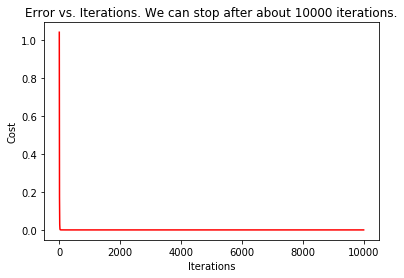

In [25]:
#plotting cost function vs iterations 
print(finalcost)
fig, ax = plt.subplots()  
ax.plot(np.arange(10000), costi, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost') 
ax.set_title('Error vs. Iterations. We can stop after about 10000 iterations.')


In [26]:
y_train=train1[:,18:19]

y_pred=np.dot(train1,thetafinal.T)
 

In [39]:
mape=0   #train
for i in range(1138):
    mape= mape + abs((y_pred[i]-y_train[i])/y_train[i])
mape= mape/3.22
print('Accuracy =', float(100-mape),'%')


Accuracy = 99.83805791812324 %


In [28]:
tested= (tester-tester.mean())/(tester.max()-tester.min())


<function print>

In [29]:
testee=(testfinal-testfinal.mean())/(testfinal.max()-testfinal.min())
teste=testee.to_numpy()
y_test= teste[:,37:38]
y_new=np.dot(tested,thetafinal.T)
print(type(y_test),type(y_new))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [31]:
tested

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,-3.117398e-03,-0.131988,-0.110309,-0.452174,-0.091311,-0.207788,0.055611,0.029999,-0.169674,-0.062639,-0.198758,-0.160455,-0.215321,-1.975367e-01,-0.206522,-0.113572,-0.161083,-0.079911,-0.175839
1,1.765324e-16,-0.006988,-0.040541,-0.302174,-0.091311,-0.093071,0.085611,0.054017,-0.169674,-0.045433,0.134576,0.061767,0.118012,-1.101580e-01,0.043478,-0.021806,-0.161083,-0.079911,-0.034806
2,-1.708193e-01,0.118012,0.246281,0.331159,-0.091311,-0.207788,-0.078451,-0.126114,0.418467,0.112544,0.134576,0.172878,0.118012,2.490653e-01,0.043478,-0.041531,-0.011829,0.007841,0.011742
3,1.956404e-01,-0.006988,-0.063797,-0.352174,0.062535,-0.118208,0.130611,0.117335,-0.169674,-0.000074,-0.198758,-0.049344,-0.215321,-1.392843e-01,0.043478,-0.008941,-0.161083,-0.079911,-0.027164
4,-8.386274e-02,-0.256988,-0.125813,-0.485507,-0.091311,-0.207788,-0.067514,-0.113378,-0.169674,-0.165350,-0.198758,-0.271567,-0.215321,-2.207511e-15,-0.456522,-0.413744,-0.161083,-0.079911,-0.115813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-2.175094e-02,-0.131988,0.168761,0.147826,-0.091311,0.018446,-0.033764,-0.074076,-0.169674,-0.137196,-0.198758,-0.160455,-0.215321,1.713954e-01,-0.206522,-0.157312,-0.161083,0.037091,-0.084133
318,6.520558e-02,0.243012,0.083490,0.397826,-0.091311,0.450805,0.124361,0.110057,0.170069,0.160510,-0.198758,-0.160455,0.118012,4.518176e-02,0.043478,0.111127,0.359813,-0.006785,0.180704
319,2.793850e-02,-0.131988,-0.094805,-0.418841,0.185612,0.110768,0.053111,0.025632,-0.169674,-0.065767,-0.198758,-0.049344,0.451346,-1.781192e-01,0.043478,-0.018375,-0.161083,-0.079911,-0.026469
320,1.148950e-01,0.118012,-0.714960,0.281159,-0.091311,-0.207788,0.116236,0.175196,0.801479,0.515307,0.467909,0.395100,0.118012,2.393565e-01,0.293478,0.332397,0.289663,-0.079911,0.150691


In [32]:
y_hat=y_new*(testfinal.max()-testfinal.mean()).SalePrice+testfinal.mean().SalePrice

In [33]:
y_check=testfinal.SalePrice

In [40]:
maper=0   #test
for i in range(322):
    maper= maper + abs((y_hat[i]-y_check[i])/y_check[i])
maper= maper/3.22
print('Accuracy =', float(100-maper),'%')

Accuracy = 91.64225160678183 %
